# N431. Convolutional Neural Networks

용어 설명

Convolution : 합성곱, 이미지에 필터 마스크를 적용한다고 생각하면 된다.

Filter: 가중치 (weights parameters)의 집합으로 이루어져 가장 작은 특징을 잡아내는 창. 필터 마스크라고 생각하면 된다.

Stride: 필터(filter)를 얼만큼씩 움직이며 이미지를 볼 지 결정하는 수 (예) 
Stride가 1이면 한칸씩 이동하며, 누락없이 모든것을 본다면, stride가 2 이면 한칸씩 건너뛰면서 Filter를 적용하게 되고, 띈 만큼 다음 레이어의 데이터의 수가 줄어든다.

Padding: Zeros(또는 다른 값)을 이미지의 외각(가장자리)에 배치하여 conv를 할 때 원래 이미지와 같은 데이터의 수를 갖을 수 있도록 도와줌 (Stride = 1일 때)

Pooling : 풀링 레이어를 사용하여 피처맵의 차원을 줄인다. 보통의 경우 컨볼루션을 적용한 이후 레이어를 풀링하여 점점 더 작은 피쳐맵를 얻습니다. 이렇게 줄어든 피쳐들을 이용하여 ANN형태의 신경망에 넣어 Classification or regression을 수행하게 된다.

Feature map(Activation map) : Input 이미지와 Filter 이미지의 Conv연산을 통해 나온 결과로 이밎지의 특징을 나타내는 역할을 한다.

###[]Convolution Layer<br>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F997FFF335B61925D04" width = '800'><br>
Convolution layer에서의 input값은 fully-connected layer와는 다르게 원형을 보존한 상태로 둔다(공간영역을 훼손하지 않는다).<br><br>

1) filter의 깊이(채널)는 input의 깊이(채널)와 같아야 하므로 3이다.<br><br>
2) input 이미지에 필터마스크를 적용하는 conv 연산을 진행한다.<br><br>
->이때 사이즈가 계속 줄어든다면 사진의 공간정보가 훼손된다는 취지에 좋지 못하기 때문에 Padding을 통해서 Output Size를 32x32로 고정할 수 있다.<br><br>
->padding을 하지 않을 경우 stride가 1이라면(마스크가 한칸씩 이동한다면) 28x28x1이라는 output(activation map)이 나오게 된다. 아래의 공식 참조<br>
<img src = "https://miro.medium.com/max/660/1*V5ZIZg7cGHLASKbnRbKBJQ.png" width = '200'><br><br>

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99FD46335B61925F0A" width = '800'><br>


<img src = "https://taewanmerepo.github.io/2018/01/cnn/conv2.jpg" width = '400'><br>
3)CNN에서는 1개의 필터만을 사용하지 않는다 예를 들어서 6개의 필터를 사용하면 6개의 feature map(actiavtion map)이 나온다.<br>
->입력 데이터의 채널 수와 상관없이 필터 별로 1개의 feature map(activation map)이 만들어 진다.<br>
->하나의 Convolution Layer에 크기가 같은 여러 개의 필터를 적용할 수 있습니다.<br> 이 경우에 Feature Map(activation map)에는 필터 갯수 만큼의 채널이 만들어집니다.<br> 입력데이터에 적용한 필터의 개수는 출력 데이터인 Feature Map(activation map)의 채널이 됩니다.<br>아래의 사진, input에 적용한 필터 수 = 192, feature map 채널수 192개<br>

<img src = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note431/CNN3.png" width = '800'><br><br>

4) 이러한 과정을 반복하는 것이 CNN이다.
-> 위의 28x28x6의 이미지에 필터를 씌우려면 필터의 채널수는 적어도 6이여야 할 것이다. 
->예를 들어 28x28x6의 이미지에 5x5x6의 필터 10개가 들어간다면 다음 activation map의 크기는 24x24x10일 것이다.
-> 필터 한개에 activation map 한 겹이 쌓인다고 생각하면 된다.<br>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99C1033F5B61926129
" width = '800'><br><br>





###[]FC(Fully Connected)
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F991CF9415B61925C1A" width = "800">
<br/>
convolution 하고, ReLU도 해주고, Pooling도 하고 이 과정들을 반복하면서 나온 가장 마지막 activation map들의 pooling까지 끝났을 때, 우리는 그 이미지들을 FC Layer에 집어넣습니다.

<br/>32x32x3 (가로 32, 세로 32, RGB)인 이미지를 10개의 클래스로 분류하는 문제.


1) 32x32x3을 입력할 수 있게 3072x1사이즈로 만든다. (input size = 32x32x3 = 3072x1)<br>
2)$W_x$값들은 (클래스 개수인) 10 * 3072로 만든다.
input과 Weight를 곱하여 10개의 output 값들을 만들어 내는 layer가 바로 Fully connected layer였습니다.

###[]SC(Skipped Connection)
<img src = "https://neurohive.io/wp-content/uploads/2019/01/resnet-e1548261477164.png" width ="400"> <br/>
일반적인 신경망 모델 학습 시 모델의 층이 깊어질수록 학습 결과가 좋을 수 있다고 알려져 있습니다. <br/>
하지만 층을 너무 깊이 쌓거나 노드 수를 너무 크게 증가시키면 입력 정보가 여러 층을 거치면서 이전 층에 대한 정보 손실이 발생할 수 있고 가중치가 잘못된 방향으로 갱신되는 문제가 발생할 수 있습니다. <br/>
그래서 이전 층의 정보를 이용하기 위해 이전 층의 정보를 연결하는 잔차 연결(skip connection)을 적용합니다. <br/>
잔차 연결이란 입력값 x를 타깃값 y로 매핑(mapping)하는 함수 H(x)를 구하는 과정에서 y를 x의 대변으로 보고 H(x)-x를 찾아 나가는 과정을 학습하는 것으로 정의합니다. <br/>
즉, 네트워크의 입력과 출력이 더해진 것이 다음 층의 입력으로 사용됩니다.

###[]Transfer Learning (전이학습)

<img src = "https://miro.medium.com/max/1000/1*LUFUl_8fqS97nUzpcFjgWw.png" width = "800"><br/>

기존(내 목적과는 다른) 데이터로 학습된 네트워크를 재사용 가능하도록하는 라이브러리

1)이전에 학습한 모델에서 파라미터를 포함한 레이어를 가져옵니다.<br/>
향후 교육 과정 중에 포함된 정보가 손상되지 않도록 해당 정보를 동결(freeze, 가중치를 업데이트 하지 않음)합니다.<br/>
2)동결된 층 위에 새로운 층 (학습 가능한 층)을 더합니다.<br/>
3)출력층(output)의 수를 조절하여 새로운 데이터셋에서 원하는 예측방법(분류, 회귀 등)으로 전환하는 방법을 배울 수 있게됩니다.<br/>
4)새로운 데이터셋에서 새로 추가한 계층만을 학습합니다.<br/>
만약 기존 레이어를 동결하지 않으면, 학습된 레이어에서 가져온 weight까지 학습하게 됩니다.<br/>
위 경우 학습할 것이 많아지므로 시간이 오래걸립니다.<br/>

#N432. Image Segmentation & Data Augmentation<br/>
이미지 분할(Image Segmentation) : 기존의 이미지 하나를 전체적으로 분류하는 classification이 아니라 이미지 내에서 object마다의 영역별로 label을 붙여 분할하고 학습하는 알고리즘
<img src = "https://chadrick-kwag.net/wp-content/uploads/2020/09/fwfewfewfewq.png">

### [] U-Net
<img src = "https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png" width = "800"><br>

이미지의 전반적인 컨텍스트 정보를 얻기 위한 네트워크 + 정확한 지역화(localizataion)을 위한 네트워크

Context: 이웃한 픽셀 간의 정보, 이미지의 일부를 보고 이미지의 문맥 파악

<img src = "https://media.vlpt.us/images/guide333/post/6b48a343-40ce-4537-8232-30df3ef37a8c/Screenshot%20from%202021-03-16%2023-28-25.png" width = "800"><br>

<img src = "https://media.vlpt.us/images/guide333/post/e70c9e4d-5a64-4c09-94b8-93f5aaf506d1/Screenshot%20from%202021-03-16%2023-30-32.png" width = "800"><br>
<img src = "https://media.vlpt.us/images/guide333/post/69e9cfbc-3db4-421e-b04a-e44b5f2c7ee9/Screenshot%20from%202021-03-16%2023-31-28.png" width = "800"><br>
<img src = "https://media.vlpt.us/images/guide333/post/0def89a9-532e-4933-bebe-16e0176391a0/Screenshot%20from%202021-03-16%2023-18-30.png" width = "800"><br>

CNN 네트워크의 얕은 층은 국소적이고 세밀한 부분의 특징을 추출하고 깊은 층은 전반적이고 추상적인 특징을 추출한다. <br>
서로 다른 특징을 추출하는 이 두 층을 결합해 주어서 국소적인 정보와 전역적인 정보를 모두 포함할 수 있게 한다.<br>
장점 : <br>
적은 양의 학습 데이터로도 Data Augmentation을 활용해 여러 Biomedical Image Segmentation 문제에서 우수한 성능을 보인다.<br>
컨텍스트 정보를 잘 사용하면서도 정확히 지역화한다.<br>
End-to-End 구조로 속도가 빠름<br>
->속도가 빠른 이유: 검증이 끝난 곳은 건너뛰고 다음 Patch부터 새 검증을 하기 때문



###[] 데이터 증강 (Data Augmentation)<br>
학습 데이터가 부족한 상황에서 Rotaion, ReScaling, Crop, Zoom, Brightness변환등을 이용해서 데이터의 양을 늘릴 수 있다.

#N433. Autoencoders (AE)
오토인코더(Autoencoders)는 입력데이터 자체를 레이블로 활용하는 학습방식 
(별도의 레이블이 필요하지 않는 비지도학습)<br>

데이터 코딩(encoding, decoding)을 위해서 원하는 차원만 할당해주면, 자동으로 학습하여 원하는 형태로 데이터의 차원을 축소해주는 신경망의 한 어플리케이션이다.<br>

학습 과정에서는 인코딩 모델(파라미터)과 디코딩 모델(파라미터)가 동시에 학습이 되지만, 이를 각각의 모델로 구분하여 사용할 수 있다.<br>

오토인코더를 통하여 데이터의 노이즈를 제거하도록 학습하면 노이즈가 제거된 데이터의 특징값을 추출하는 특성값 추출기(Feature extractor)로 활용할 수 있고 이 모델을 다양한 방식으로 활용할 수 있습니다.<br>

Autoencoder는 encoder와 decoder로 구성되어 있다.<br>
Decoder와 Encoder를 구분할 수 있다.<br>
단순한 Dense형태로도 구성할 수 있지만, CNN을 이용한 구성도 가능하다<br><br>
오토인코더의 용도<br>
노이즈를 제거하는 용도로 사용할 수 있고,<br>
재구성을 통한 이상값을 찾아내는 데도 사용할 수 있으며,<br>
특성을 추출하는 용도로서도 사용할 수 있다.<br>

오토인코더는 "출력 = 입력"을 학습시키는 신경망이다. 비지도학습이라고도 하지만, Self-supervised learning(SSL)과도 비슷한 개념이다.<br/>
학습이 완료된 후에 입력과 완벽히 똑같은 출력을 만들 수는 없지만 매우 근사하게 복제가 된다.<br/><br/>
Loss Function에서 입력과 출력의 차이를 이용하기 때문에 출력은 입력과 최대한 근사하게 만들기 위해서 Laten Representaion으로 encoding하고 다시 data로 decoding하면서 **latent는 데이터의 정보량이 많은 부분이나 대표적인 속성을 우선 학습한다. 그렇기 때문에 AE를 생성 모델적 접근 방식에서도 중요하게 다룬다**.<br/>

<img src = "https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" width = "800">

#N434.Generative Adversarial Networks, GAN

GAN이란 Generator와 Descriminator의 경쟁으로 학습하는 원리이다.

개념의 이해를 위해서 전통적인 설명을 추가하면, 위조지폐에 대해서 얘기를 해보겠습니다. 위조지폐를 만들려는 "위조지폐범"이 있고, 위조지폐와 진폐를 잘 가려내고 싶은 "조폐공사"가 있다고 하자. 조폐공사에서는 위폐를 감별하는 기술을 지폐에 적용해야 합니다. 반대로 위조지폐범은 감별하는 기술에 걸리지 않는 위조지폐를 만들려고 기술을 발전시킵니다. 서로의 정보를 참고해서 기술이 발달되기 때문에 지폐를 제작하는 기술이 점점 좋아지게 됩니다. 그럼 더욱 정교한 위조지폐를 만들 수 있게 되는 원리입니다.<br>

훈련 과정동안 Generator는 실제같은 이미지를 잘 생성하게 되고 Descriminator는 점차 진짜와 가짜를 더 잘 구별하게 된다. 이 과정은 Descrimiator가 더 이상 진짜와 가짜를 구별하지 못할때 평형상태에 도달하게 된다.<br>






###[] DCGAN
Deep Convolution GAN으로 lanGoodFellow의 original GAN 구조를 발전시켜서 최초로 고화질 영상을 생성 시킬 수 있는 알고리즘이다. 기존 GAN은 복잡한 영상에 대해서는 그렇게 좋은 이미지를 생성했다고 말하기 힘들다. 뿐만 아니라 안정성이 떨어지는 심각한 문제가 있기 때문에 DCGAN을 통해서 구조를 개선 했다.<br>

<img src = "https://gluon.mxnet.io/_images/dcgan.png" width = "800"><br>


1)MaxPooling Layer 를 없애서 stride convolution이나 fractional-strided convolution을 사용해서 feature map의 크기를 조절.<br>
2)Batch Normaliztion을 적용<br>
3)Fully Connected Hidden Layer 제거<br>
4)Generator의 출력단의 활성함수로 Tanh를 사용하고 나머지 Layer는 ReLU를 사용<br>
4)Discriminator의 활성함수로 LeakyReLU를 사용.<br>

[자세한 정보 (라온피플)](https://m.blog.naver.com/laonple/221201915691)

###[] CycleGAN

아래와 같이 사진이 주어졌을때 다른 사진으로 변형을 시키는 것이 가능.<br>
말 <-> 얼룩말 간의 변환이 가능.<br>
여름 <-> 겨울 사진 변환도 가능.<br>
일반 사진 <-> 아웃오브 포커스 사진 변환 가능<br>
사이클 GAN은 사진을 특정화풍의 그림으로도 바꿀수 있고 그림을 사진으로도 바꿀 수 있다.

Cycle GAN은  Pix2Pix방식과 GAN을 결합해서 만든 알고리즘이다.<br>


#### -> Pix2Pix
Pix2Pix란 self supervised, supervised learning으로 input output이 모두 이미지이다. self supervised인 이유는 사람이 label을 붙이지 않아도 gray-scale변환을 통해 알아서 정답지를 학습 시킬 수 있기 때문이다.<br>

1) 흑백사진을 컬러 사진으로 바꾸는 학습을 시켰을때 학습데이터에 등장하지 않은 사진을 컬러 사진으로 바꾼다.<br>

2)위와 같이 건물의 양식을 픽셀별로 나타낸 그림을 학습 시키고 건물 사진을 만들어 내는 학습이 가능하다.<br>


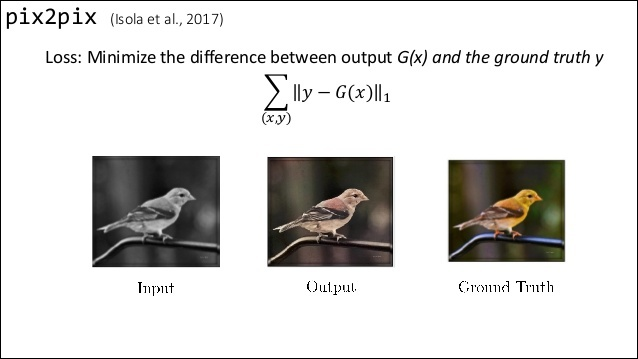

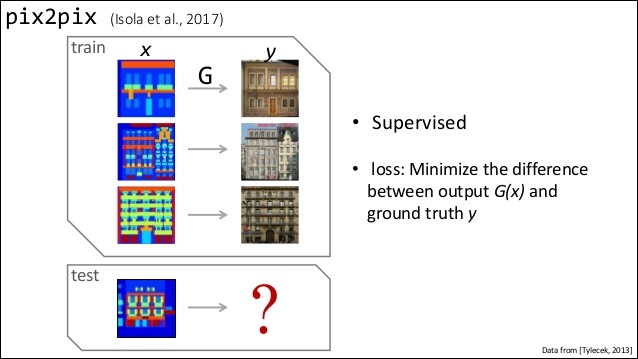

한계점 : 학습을 을 시켰을때 정답에 비해서 뿌옇고 색이 부조화스럽다는 한계점이 있다.<br>
한계점이 나타나는 이유 : loss를 막기 위해 흑백이 아닌 색을 모델이 선택하는데 이때 색에 대한 가이드라인이 따로 없어서 모델이 중간값을 고르는 경향이 나타나기 때문이다.

여기서 GAN을 적용한 Cycle GAN이 탄생하게 되었는데 Pix2Pix와의 주요 차이점은 손실 함수와 페어링 되지 않은 훈련 데이터 사용이다.<br>
CycleGAN은 주기 일관성 손실을 사용하여 쌍을 이루는 데이터 없이도 훈련을 가능하게 한다. <br>
다시말해서, 소스 및 대상 도메인 간의 일대일 매핑없이 한 도메인에서 다른 도메인으로 변환 할 수 있습니다.

예를 들어서 해상도향상, 사진의 그림화, 스타일 변환 등과 같은 많은 작업들이 가능하다

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Object-Transfiguration-from-Apples-to-Oranges-and-Oranges-to-Apples.png" width=800/>

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Season-Transfer-from-Winter-to-Summer-and-Summer-to-Winter.png" width=800/>